In [1]:
import warnings
warnings.filterwarnings("ignore")

from jqdatasdk import *
auth('18810883096', 'Ww19930921')
# 查询是否连接成功
is_auth = is_auth()

提示：当前环境pandas版本为0.25，get_price与get_fundamentals_continuously接口panel参数将固定为False
注意：0.25以上版本pandas不支持panel，如使用该数据结构和相关函数请注意修改
auth success 


In [2]:
#平安银行 000001 
get_industry("000001.XSHE", date=None)

{'000001.XSHE': {'sw_l1': {'industry_code': '801780', 'industry_name': '银行I'},
  'sw_l2': {'industry_code': '801192', 'industry_name': '银行II'},
  'sw_l3': {'industry_code': '851911', 'industry_name': '银行III'},
  'zjw': {'industry_code': 'J66', 'industry_name': '货币金融服务'},
  'jq_l2': {'industry_code': 'HY493', 'industry_name': '多元化银行指数'},
  'jq_l1': {'industry_code': 'HY007', 'industry_name': '金融指数'}}}

In [3]:
# 银行行业的成分股
sw_id='801192'
stocks = get_industry_stocks(sw_id)
print(stocks)

['000001.XSHE', '002142.XSHE', '002807.XSHE', '002839.XSHE', '002936.XSHE', '002948.XSHE', '002958.XSHE', '002966.XSHE', '600000.XSHG', '600015.XSHG', '600016.XSHG', '600036.XSHG', '600908.XSHG', '600919.XSHG', '600926.XSHG', '600928.XSHG', '601009.XSHG', '601077.XSHG', '601128.XSHG', '601166.XSHG', '601169.XSHG', '601229.XSHG', '601288.XSHG', '601328.XSHG', '601398.XSHG', '601577.XSHG', '601658.XSHG', '601818.XSHG', '601838.XSHG', '601860.XSHG', '601916.XSHG', '601939.XSHG', '601988.XSHG', '601997.XSHG', '601998.XSHG', '603323.XSHG']


In [4]:
stock_name={}
for stock in stocks:
    stock_name[stock]=get_security_info(stock).display_name

In [5]:
# 获取一支股票
start_date="2018-04-01"
end_date="2020-08-20"

df_dict={}
for stock in stocks:
    df_dict[stock] = get_price(stock, start_date=start_date, end_date=end_date,fq="pre") # 获得000001.XSHG的2015年12月1号14:00-2015年12月2日12:00的分钟数据
print("load data")

load data


ValueError: x and y must have same first dimension, but have shapes (582,) and (5,)

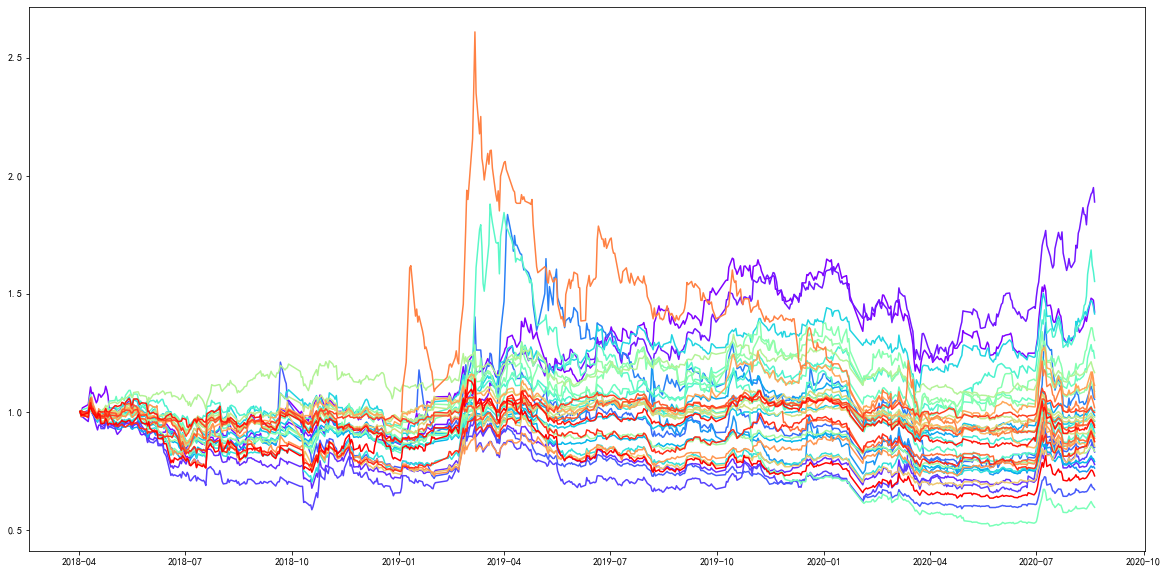

In [6]:
#coding:utf-8
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'

import numpy as np

x = np.linspace(0, 1, 100)
number = len(stocks)
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, number)]

plt.rcParams['figure.figsize'] = (20.0, 10.0) # 显示大小
for i, stock in enumerate(stocks):
    df=df_dict[stock].dropna()
    plt.plot(df['close']/df['close'][0],color=colors[i],label=stock_name[stock])
    
df_indus = finance.run_query(
    query(finance.SW1_DAILY_PRICE).filter(
        finance.SW1_DAILY_PRICE.code == sw_id,
        finance.SW1_DAILY_PRICE.date >= start_date,
        finance.SW1_DAILY_PRICE.date <= end_date).order_by(
        finance.SW1_DAILY_PRICE.date.desc()).limit(1000))
plt.plot(list(df_dict[stock].T),df_indus['close']/df_indus['close'].values[-1],marker='+', linestyle='--', linewidth=1, markersize=4,label="steel")
plt.legend()

In [7]:
import pandas as pd
stock_return={}
for stock in stocks:
    df=df_dict[stock].dropna()
    stock_return[stock]=(df['close']/df['close'][0]).values[-1]
df_stock=pd.DataFrame({'name':stock_name,
       'return':stock_return})
df_stock.sort_values(by="return",inplace=True,ascending=False)
print(df_indus["close"].values[0]/df_indus["close"].values[-1])
print(df_stock)


1.001170791886502
             name    return
002142.XSHE  宁波银行  1.888271
600926.XSHG  杭州银行  1.551630
000001.XSHE  平安银行  1.422027
600036.XSHG  招商银行  1.413715
601128.XSHG  常熟银行  1.301391
601009.XSHG  南京银行  1.226819
601229.XSHG  上海银行  1.165278
601818.XSHG  光大银行  1.111111
601166.XSHG  兴业银行  1.086124
601838.XSHG  成都银行  1.059732
002958.XSHE  青农商行  1.051852
601860.XSHG  紫金银行  1.016092
600919.XSHG  江苏银行  1.004666
601988.XSHG  中国银行  0.997006
600000.XSHG  浦发银行  0.982176
601288.XSHG  农业银行  0.975904
601398.XSHG  工商银行  0.961538
600016.XSHG  民生银行  0.958834
601939.XSHG  建设银行  0.942249
601998.XSHG  中信银行  0.932624
600908.XSHG  无锡银行  0.910906
601328.XSHG  交通银行  0.906844
600928.XSHG  西安银行  0.893584
601916.XSHG  浙商银行  0.885835
601658.XSHG  邮储银行  0.873606
601997.XSHG  贵阳银行  0.872340
601577.XSHG  长沙银行  0.853432
002948.XSHE  青岛银行  0.848185
601169.XSHG  北京银行  0.831919
002839.XSHE  张家港行  0.828608
600015.XSHG  华夏银行  0.787990
002807.XSHE  江阴银行  0.775583
002966.XSHE  苏州银行  0.760398
603323.XSHG  苏农银行  0.727549
00